<a href="https://colab.research.google.com/github/duybluemind1988/Data-science/blob/master/Edx_final_project_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/daily-case/COVID-19-geographic-disbtribution-worldwide-2020-03-18.xls
/kaggle/input/daily-case/COVID-19-geographic-disbtribution-worldwide-2020-03-20.xlsx
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv
/kaggle/input/vndataset/VietNam 19-3.csv
/kaggle/input/location/locat.csv
/kaggle/input/location/vietnam.csv
/kaggle/input/world-loc/loc.csv
/kaggle/input/jhudata/JHU-18-3.csv
/kaggle/input/jhudata/JHU 19-3.csv


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

all_info = pd.read_csv("../input/jhudata/JHU 19-3.csv")
vietnam = pd.read_csv("../input/vndataset/VietNam 19-3.csv")


#Description:
#Novel corona virus 2019 dataset: import from Kaggle (daily update)
#vndataset: manual import
#daily case: https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide
#world-loc: not use here, check available location
#jhu data: import from JHU CSSE github (total confirm, death, recover all country update)

### Locations

In [ ]:
vietnam

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Ha Noi,Vietnam,2020-03-19,24,NaN,NaN,21.027763,105.834160
1,Ho Chi Minh,Vietnam,2020-03-19,17,NaN,3.0,21.362410,105.554451
2,Vinh Phuc,Vietnam,2020-03-19,11,NaN,11.0,NaN,NaN
3,Binh Thuan,Vietnam,2020-03-19,9,NaN,NaN,NaN,NaN
4,Quang Ninh,Vietnam,2020-03-19,6,NaN,NaN,NaN,NaN
5,Da Nang,Vietnam,2020-03-19,4,NaN,NaN,NaN,NaN
6,Quang Nam,Vietnam,2020-03-19,3,NaN,NaN,NaN,NaN
7,Lao Cai,Vietnam,2020-03-19,2,NaN,NaN,NaN,NaN
8,Thua Thien Hue,Vietnam,2020-03-19,2,NaN,NaN,NaN,NaN
9,Ninh Thuan,Vietnam,2020-03-19,2,NaN,NaN,NaN,NaN


In [ ]:
def location(name):
    from geopy.geocoders import Nominatim
    geolocator = Nominatim(user_agent="specify_your_app_name_here")
    location = geolocator.geocode(name)
    #print(location.address)
    return (location.latitude,location.longitude)
    

In [ ]:
import time

count=0 
for i in range(len(vietnam['Province/State'])): 
  address = vietnam['Province/State'][i] 
  a =location(address) 
  vietnam['Latitude'][i]= a[0] 
  vietnam['Longitude'][i]=a[1] 
  count+=1 
  if count % 10 == 0 : print('Pausing for a bit...') time.sleep(2)

vietnam.head()

In [ ]:
import pandas as pd
vietnam=pd.read_csv('../input/location/vietnam.csv')
vietnam=vietnam.drop('Unnamed: 0', axis=1)
vietnam.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Ha Noi,Vietnam,2020-03-19,24,NaN,NaN,21.029450,105.854444
1,Ho Chi Minh,Vietnam,2020-03-19,17,NaN,3.0,10.775844,106.701755
2,Vinh Phuc,Vietnam,2020-03-19,11,NaN,11.0,21.311356,105.603294
3,Binh Thuan,Vietnam,2020-03-19,9,NaN,NaN,11.101462,107.941594
4,Quang Ninh,Vietnam,2020-03-19,6,NaN,NaN,10.043497,105.782998


import time

count=0
for i in range(len(vietnam['Province/State'])):
    address = vietnam['Province/State'][i]
    a =location(address)
    vietnam['Latitude'][i]= a[0]
    vietnam['Longitude'][i]=a[1]
    count+=1
    if count % 10 == 0 :
        print('Pausing for a bit...')
        time.sleep(2)

vietnam.head()

### Distribution cases in VietNam

In [ ]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: pink' if v else '' for v in is_max]



#df.style.apply(highlight_max,subset=['Total Confirmed cases (Indian National)', 'Total Confirmed cases ( Foreign National )'])
vietnam.style.apply(highlight_max,subset=['Recovered', 'Deaths','Confirmed'])

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Ha Noi,Vietnam,2020-03-19,24,nan,nan,21.0294,105.854
1,Ho Chi Minh,Vietnam,2020-03-19,17,nan,3,10.7758,106.702
2,Vinh Phuc,Vietnam,2020-03-19,11,nan,11,21.3114,105.603
3,Binh Thuan,Vietnam,2020-03-19,9,nan,nan,11.1015,107.942
4,Quang Ninh,Vietnam,2020-03-19,6,nan,nan,10.0435,105.783
5,Da Nang,Vietnam,2020-03-19,4,nan,nan,16.068,108.212
6,Quang Nam,Vietnam,2020-03-19,3,nan,nan,11.9537,108.431
7,Lao Cai,Vietnam,2020-03-19,2,nan,nan,22.2968,104.057
8,Thua Thien Hue,Vietnam,2020-03-19,2,nan,nan,16.3375,107.556
9,Ninh Thuan,Vietnam,2020-03-19,2,nan,nan,11.745,108.898


In [ ]:
vietnam = vietnam.sort_values(by=['Confirmed'],ascending = False)
vietnam= vietnam.reset_index(drop=True).fillna(0)
vietnam

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Ha Noi,Vietnam,2020-03-19,24,0.0,0.0,21.029450,105.854444
1,Ho Chi Minh,Vietnam,2020-03-19,17,0.0,3.0,10.775844,106.701755
2,Vinh Phuc,Vietnam,2020-03-19,11,0.0,11.0,21.311356,105.603294
3,Binh Thuan,Vietnam,2020-03-19,9,0.0,0.0,11.101462,107.941594
4,Quang Ninh,Vietnam,2020-03-19,6,0.0,0.0,10.043497,105.782998
5,Da Nang,Vietnam,2020-03-19,4,0.0,0.0,16.068000,108.212000
6,Quang Nam,Vietnam,2020-03-19,3,0.0,0.0,11.953707,108.430610
7,Lao Cai,Vietnam,2020-03-19,2,0.0,0.0,22.296766,104.056616
8,Thua Thien Hue,Vietnam,2020-03-19,2,0.0,0.0,16.337537,107.556371
9,Ninh Thuan,Vietnam,2020-03-19,2,0.0,0.0,11.744972,108.898341


In [ ]:
x = vietnam.iloc[:,0:6]
x.style.background_gradient(cmap='Reds')

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Ha Noi,Vietnam,2020-03-19,24,0,0
1,Ho Chi Minh,Vietnam,2020-03-19,17,0,3
2,Vinh Phuc,Vietnam,2020-03-19,11,0,11
3,Binh Thuan,Vietnam,2020-03-19,9,0,0
4,Quang Ninh,Vietnam,2020-03-19,6,0,0
5,Da Nang,Vietnam,2020-03-19,4,0,0
6,Quang Nam,Vietnam,2020-03-19,3,0,0
7,Lao Cai,Vietnam,2020-03-19,2,0,0
8,Thua Thien Hue,Vietnam,2020-03-19,2,0,0
9,Ninh Thuan,Vietnam,2020-03-19,2,0,0


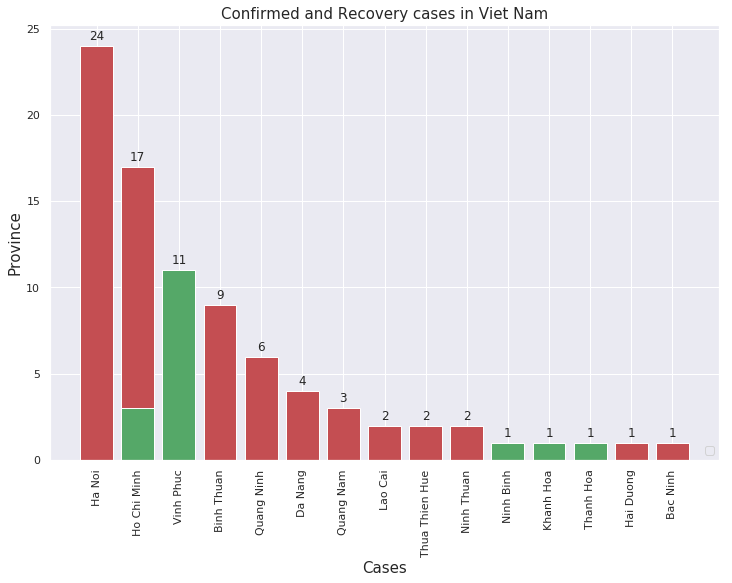

In [ ]:
f, ax = plt.subplots(figsize =(12,8))
#sns.set_color_codes('dark')
#sns.barplot(x='Confirmed', y = 'Province/State',data=vietnam,label='Total',color='r')
#sns.set_color_codes("muted")
#sns.barplot(x='Recovered', y='Province/State', data=vietnam,label="Recovered", color="g")
# Add a legend and informative axis label

rects1=ax.bar(vietnam['Province/State'],vietnam['Confirmed'],color='r')
ax.bar(vietnam['Province/State'],vietnam['Recovered'],color='g')

ax.set_title('Confirmed and Recovery cases in Viet Nam',fontsize=15)
ax.set_xlabel('Cases',fontsize=15)
ax.set_ylabel('Province',fontsize=15)
ax.set_xticks(vietnam['Province/State'])
ax.set_xticklabels(vietnam['Province/State'],rotation=90)
ax.legend(ncol=2, loc="lower right", frameon=True)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)

## Visualising the spread geographically

In [ ]:
# create map and display it

import folium 
from folium import plugins

tileLayer=['openstreetmap','Stamen Terrain','stamentoner','stamenwatercolor','Mapbox Bright','Mapbox Control Room','cartodbpositron','cartodbdark_matter']
mymap = folium.Map(location=[16, 106], zoom_start=5)
folium.TileLayer(tileLayer[0]).add_to(mymap)

#zip to assign mulity variant to different df column
for lat, lon, confirm, death, name in zip(vietnam['Latitude'], vietnam['Longitude'], vietnam['Confirmed'],vietnam['Deaths'].astype('int64'), vietnam['Province/State']):
    
    folium.CircleMarker([lat, lon],
                        radius=confirm*0.8,
                        popup = ('<strong>Province</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Confirmed: </strong>: ' + str(confirm) + '<br>'
                                '<strong>Deaths: </strong>: ' + str(death) + '<br>'),
                        
                        color='red',
                        fill_color='red',
                        fill_opacity=0.3 ).add_to(mymap)
mymap

In [ ]:
all_info.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-19T10:13:14,67800,3130,57682,30.9756,112.2707
1,NaN,Italy,2020-03-19T17:43:03,41035,3405,4440,41.8719,12.5674
2,NaN,Iran,2020-03-19T11:33:29,18407,1284,5710,32.4279,53.6880
3,NaN,Spain,2020-03-19T20:13:08,17963,830,1107,40.4637,-3.7492
4,NaN,Germany,2020-03-19T20:13:08,15320,44,113,51.1657,10.4515


In [ ]:
#inplace: remove duplicate value, must have
#drop: remove column duplicate
locat=all_info[['Country/Region']].sort_values('Country/Region',ascending =True).reset_index(drop=True)
locat.drop_duplicates(subset = 'Country/Region',inplace=True)
locat.reset_index(drop=True,inplace = True)
locat['Latitude']=""
locat['Longitude']=""
locat.tail()

,Country/Region,Latitude,Longitude
163,Uruguay,,
164,Uzbekistan,,
165,Venezuela,,
166,Vietnam,,
167,Zambia,,


In [ ]:
#locat.index=locat['Country/Region']
#locat=locat.reset_index(drop=True)
#locat.drop('Country/Region',axis=1,inplace=True)
#locat.head()

oldloc =pd.read_csv("../input/world-loc/loc.csv")
#oldloc.index=oldloc['Country/Region']
#oldloc.drop(['Unnamed: 0','Country/Region'],axis=1,inplace=True)
oldloc.head()

i=2
address = locat['Country/Region'][i]
print(address)
print(type(address))
print(oldloc.index.get_loc('Azerbaijan'))
print(oldloc.index.get_loc(address))
k=oldloc.index.get_loc(address)
print(k)
oldloc['Latitude'][k]

In [ ]:
import pandas as pd
locat=pd.read_csv('../input/location/locat.csv')
locat=locat.drop('Unnamed: 0', axis=1)
locat.head()

,Country/Region,Latitude,Longitude
0,Afghanistan,33.768006,66.238514
1,Albania,41.000028,19.999962
2,Algeria,28.000027,2.999983
3,Andorra,42.540717,1.573203
4,Antigua and Barbuda,17.223472,-61.955461


import time
count=0
#oldloc =pd.read_csv("../input/world-loc/loc.csv")
for i in range(len(locat['Country/Region'])):
        address=locat['Country/Region'][i]
        try:
            a =location(address)
            locat['Latitude'][i]= a[0]
            locat['Longitude'][i]=a[1]
        except Exception as e:  #print all error occur
            print(e,' : ',address)
            continue
        #Avoid api request a lot in short time (not catch all location request). Each 10 requesets will be lost 1
        count+=1
        if count % 10 == 0 :
            print('Pausing for a bit...')
            time.sleep(1)

locat.tail()

In [ ]:
#Group all_infor by Country, sum all column

all_infor_new=all_info[['Country/Region','Confirmed','Deaths','Recovered']].groupby('Country/Region').sum().reset_index()
all_infor_new.tail()

,Country/Region,Confirmed,Deaths,Recovered
163,Uruguay,79,0,0
164,Uzbekistan,23,0,0
165,Venezuela,42,0,0
166,Vietnam,85,0,16
167,Zambia,2,0,0


In [ ]:
#Sort all_infor_new:
all_word_new=all_infor_new.sort_values(by=['Confirmed'],ascending = False)
all_word_new = all_word_new.reset_index(drop=True)
all_word_new

,Country/Region,Confirmed,Deaths,Recovered
0,China,81156,3249,70535
1,Italy,41035,3405,4440
2,Iran,18407,1284,5710
3,Spain,17963,830,1107
4,Germany,15320,44,113
...,...,...,...,...
163,Guernsey,0,0,0
164,Greenland,0,0,0
165,Republic of the Congo,0,0,0
166,Jersey,0,0,0


In [ ]:
#Top 50 countries :
all_word_new.iloc[:25].style.background_gradient(cmap='Reds')

,Country/Region,Confirmed,Deaths,Recovered
0,China,81156,3249,70535
1,Italy,41035,3405,4440
2,Iran,18407,1284,5710
3,Spain,17963,830,1107
4,Germany,15320,44,113
5,US,13680,200,108
6,France,10886,243,12
7,"Korea, South",8565,91,1540
8,Switzerland,4075,41,15
9,United Kingdom,2716,138,67


In [ ]:
#Merge
all_word=all_infor_new.merge(locat,on='Country/Region',how='outer')
all_word

,Country/Region,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Afghanistan,22,0,1,33.768006,66.238514
1,Albania,64,2,0,41.000028,19.999962
2,Algeria,87,9,32,28.000027,2.999983
3,Andorra,53,0,1,42.540717,1.573203
4,Antigua and Barbuda,1,0,0,17.223472,-61.955461
...,...,...,...,...,...,...
163,Uruguay,79,0,0,-32.875555,-56.020153
164,Uzbekistan,23,0,0,41.323730,63.952810
165,Venezuela,42,0,0,8.001871,-66.110932
166,Vietnam,85,0,16,13.290403,108.426511


In [ ]:
#conver object to numeric value for map process
all_word['Longitude'] = pd.to_numeric(all_word['Longitude'],errors='coerce')
all_word['Latitude'] = pd.to_numeric(all_word['Latitude'],errors='coerce')
#drop null value for map process
all_word=all_word.dropna()

In [ ]:
tileLayer=['openstreetmap','Stamen Terrain','stamentoner','stamenwatercolor','Mapbox Bright','Mapbox Control Room','cartodbpositron','cartodbdark_matter']
mymap1 = folium.Map(location=[16, 106], zoom_start=3)
folium.TileLayer(tileLayer[0]).add_to(mymap1)

#zip to assign mulity variant to different df column
for lat, lon, confirm, death, name in zip(all_word['Latitude'], all_word['Longitude'], all_word['Confirmed'],all_word['Deaths'], all_word['Country/Region']):
    
    folium.CircleMarker([lat, lon],
                        popup = ('<strong>Province</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Confirmed: </strong>: ' + str(confirm) + '<br>'
                                '<strong>Deaths: </strong>: ' + str(death) + '<br>'),
                        radius= confirm*0.001 if confirm <80000 else 80000*0.001,
                        color='red',
                        fill_color='red',
                        fill_opacity=0.3 ).add_to(mymap1)
mymap1

### How the Coronavirus cases are rising

In [ ]:
ts_confirmed = pd.read_csv("../input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv")
ts_confirmed=ts_confirmed.reset_index(drop=True)
ts_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,53,59,70,75,82,114,147,177,212,272
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,581,639,639,701,773,839,825,878,889,924
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,160,178,178,200,212,226,243,266,313,345
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,129,149,149,197,238,428,566,673,790,900


In [ ]:
len(ts_confirmed)

468

In [ ]:
ts_confirmed1=ts_confirmed.groupby('Country/Region').sum()
ts_confirmed1.drop(["Lat", "Long"], axis = 1, inplace = True)  
#ts_confirmed1=ts_confirmed1.reset_index() #Can skip for transpose
ts_confirmed1.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,5,7,7,7,11,16,21,22,22,22
Albania,0,0,0,0,0,0,0,0,0,0,...,10,12,23,33,38,42,51,55,59,64
Algeria,0,0,0,0,0,0,0,0,0,0,...,20,20,24,26,37,48,54,60,74,87
Andorra,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,2,39,39,53
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1


In [ ]:
ts_confirmed2=ts_confirmed1.transpose()
ts_confirmed2.rename(columns={'Country/Region':'Date'},inplace=True)
ts_confirmed2.head()


Country/Region,Afghanistan,Albania,Algeria,Andorra,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,Turkey,US,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,2,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,2,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,2,0
1/26/20,0,0,0,0,0,0,0,4,0,0,...,0,5,0,0,0,0,0,0,2,0


In [ ]:
#Change col position
ts_confirmed2['Date']=ts_confirmed2.index
cols = ts_confirmed2.columns.tolist()
cols=cols[-1:]+cols[:-1]
ts_confirmed2=ts_confirmed2[cols]
ts_confirmed2=ts_confirmed2.reset_index(drop=True)
ts_confirmed2.head()


Country/Region,Date,Afghanistan,Albania,Algeria,Andorra,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Turkey,US,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia
0,1/22/20,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1/23/20,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,2,0
2,1/24/20,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,2,0
3,1/25/20,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,2,0
4,1/26/20,0,0,0,0,0,0,0,4,0,...,0,5,0,0,0,0,0,0,2,0


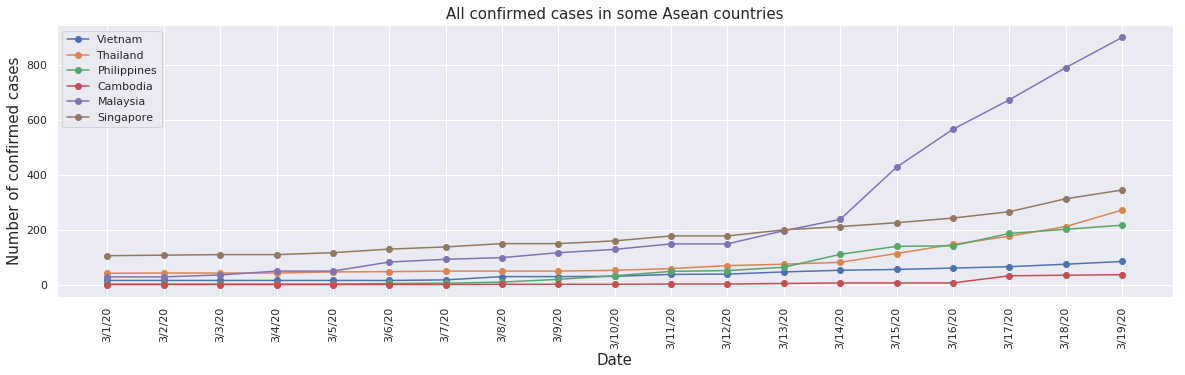

In [ ]:
df=ts_confirmed2
fig,ax=plt.subplots(figsize=(20,5))
country=['Vietnam','Thailand','Philippines','Cambodia','Malaysia','Singapore']

for name in country:
    filter_a= df['Date'] >= '2020-03-01'
    ax.plot(df[name][filter_a].values,marker='o',label=name)

x=df['Date'][filter_a]
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x,rotation=90)

ax.set_title('All confirmed cases in some Asean countries',fontsize=15)
ax.set_xlabel('Date',fontsize=15)
ax.set_ylabel('Number of confirmed cases',fontsize=15)
ax.legend(loc='upper left')
plt.show()

### Number of Deaths case

In [ ]:
ts_deaths = pd.read_csv("../input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv")
ts_deaths=ts_deaths.reset_index(drop=True)
ts_deaths=ts_deaths.groupby('Country/Region').sum()
ts_deaths.drop(["Lat", "Long"], axis = 1, inplace = True)  
ts_deaths=ts_deaths.transpose()
ts_deaths.rename(columns={'Country/Region':'Date'},inplace=True)
ts_deaths['Date']=ts_deaths.index
cols = ts_deaths.columns.tolist()
cols=cols[-1:]+cols[:-1]
ts_deaths=ts_deaths[cols]
ts_deaths=ts_deaths.reset_index(drop=True)
ts_deaths.head()



Country/Region,Date,Afghanistan,Albania,Algeria,Andorra,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Turkey,US,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia
0,1/22/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1/24/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1/25/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1/26/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


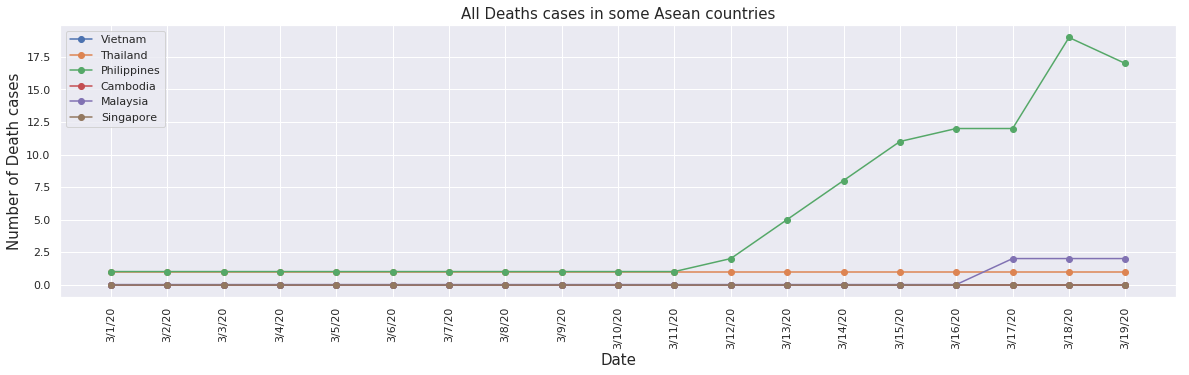

In [ ]:
df=ts_deaths
fig,ax=plt.subplots(figsize=(20,5))

country=['Vietnam','Thailand','Philippines','Cambodia','Malaysia','Singapore']
for name in country:
    filter_a= df['Date'] >= '2020-03-01'
    ax.plot(df[name][filter_a].values,marker='o',label=name)

x=df['Date'][filter_a]
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x,rotation=90)

ax.set_title('All Deaths cases in some Asean countries',fontsize=15)
ax.set_xlabel('Date',fontsize=15)
ax.set_ylabel('Number of Death cases',fontsize=15)
ax.legend(loc='upper left')
plt.show()

### Number of Recoverd case

In [ ]:
ts_recovered = pd.read_csv("../input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv")
ts_recovered=ts_recovered.reset_index(drop=True)
ts_recovered=ts_recovered.groupby('Country/Region').sum()
ts_recovered.drop(["Lat", "Long"], axis = 1, inplace = True)  
ts_recovered=ts_recovered.transpose()
ts_recovered.rename(columns={'Country/Region':'Date'},inplace=True)
ts_recovered['Date']=ts_recovered.index
cols = ts_recovered.columns.tolist()
cols=cols[-1:]+cols[:-1]
ts_recovered=ts_recovered[cols]
ts_recovered=ts_recovered.reset_index(drop=True)
ts_recovered.head()

Country/Region,Date,Afghanistan,Albania,Algeria,Andorra,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Turkey,US,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia
0,1/22/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1/24/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1/25/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1/26/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


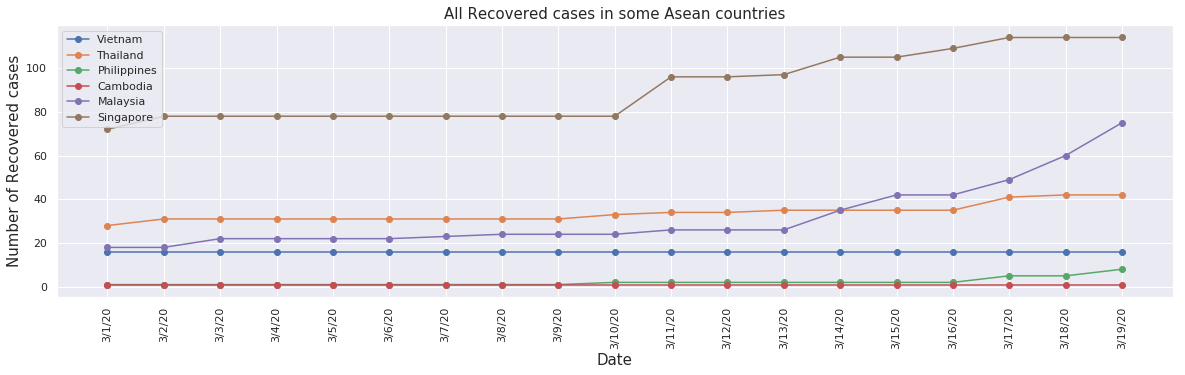

In [ ]:
df=ts_recovered
fig,ax=plt.subplots(figsize=(20,5))

country=['Vietnam','Thailand','Philippines','Cambodia','Malaysia','Singapore']
for name in country:
    filter_a= df['Date'] >= '2020-03-01'
    ax.plot(df[name][filter_a].values,marker='o',label=name)

x=df['Date'][filter_a]
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x,rotation=90)


ax.set_title('All Recovered cases in some Asean countries',fontsize=15)
ax.set_xlabel('Date',fontsize=15)
ax.set_ylabel('Number of Recovered cases',fontsize=15)
ax.legend(loc='upper left')
plt.show()

### Comparision

In [ ]:
all_word.tail()

,Country/Region,Confirmed,Deaths,Recovered,Latitude,Longitude
163,Uruguay,79,0,0,-32.875555,-56.020153
164,Uzbekistan,23,0,0,41.323730,63.952810
165,Venezuela,42,0,0,8.001871,-66.110932
166,Vietnam,85,0,16,13.290403,108.426511
167,Zambia,2,0,0,-14.518624,27.559916


In [ ]:

df=all_word
df.index=df['Country/Region']
df.drop(['Latitude','Longitude','Country/Region'],axis=1,inplace=True)
df.tail()

,Confirmed,Deaths,Recovered
Country/Region,,,
Uruguay,79,0,0
Uzbekistan,23,0,0
Venezuela,42,0,0
Vietnam,85,0,16
Zambia,2,0,0


In [ ]:
#df.to_csv('df.csv')

In [ ]:
df.index.get_loc('China')

31

In [ ]:
df.index[29]

'Chad'

In [ ]:
country=['Vietnam','Thailand','Philippines','Cambodia','Malaysia','Singapore','Brunei','Indonesia']
a=[]
for i in range(len(country)):
    a.append(df.index.get_loc(country[i]))
a

[166, 152, 122, 25, 96, 139, 22, 74]

In [ ]:
#df.iloc[150:160].plot.bar()
#df.iloc[[a[0],a[1],a[2],a[3],a[4],a[5],a[6],a[7]]].plot.bar(figsize=(20,5))

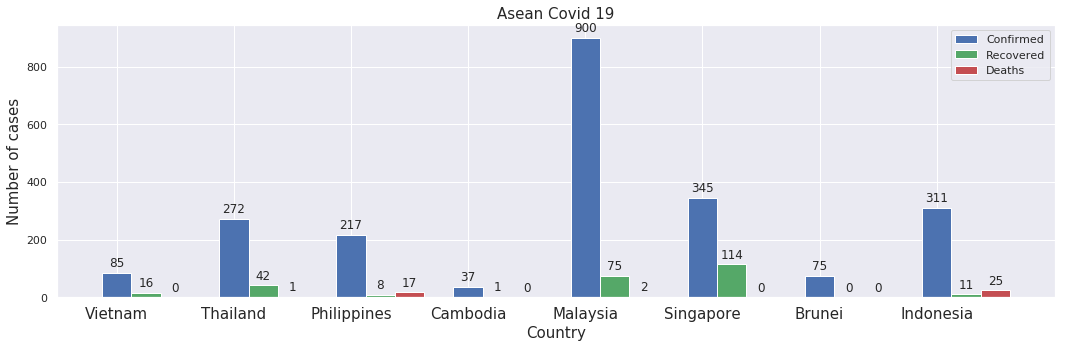

In [ ]:
#df.index[29] :China
country=['Vietnam','Thailand','Philippines','Cambodia','Malaysia','Singapore','Brunei','Indonesia']

index=[]
Confirmed =[]
Recovered = []
Deaths = []
for i in range(len(country)):
    index.append(df.index.get_loc(country[i]))
    Confirmed.append(df['Confirmed'][index[i]])
    Recovered.append(df['Recovered'][index[i]])
    Deaths.append(df['Deaths'][index[i]])                 
#index = [161, 147, 117, 24]
#Confirmed =[75, 212, 202, 35]
#Recovered = [16, 42, 5, 1]
#Deaths = [0, 1, 19, 0]
x = np.arange(len(country))

fig, ax = plt.subplots(figsize=(15,5))
rects1 = ax.bar(x + 0, Confirmed, color = 'b', width = 0.25,label='Confirmed')
rects2 = ax.bar(x + 0.25, Recovered, color = 'g', width = 0.25,label='Recovered')
rects3 = ax.bar(x + 0.5, Deaths, color = 'r', width = 0.25,label='Deaths')

ax.set_xlabel('Country',fontsize=15)
ax.set_ylabel('Number of cases',fontsize=15)
ax.set_title('Asean Covid 19',fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(country,fontsize=15)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

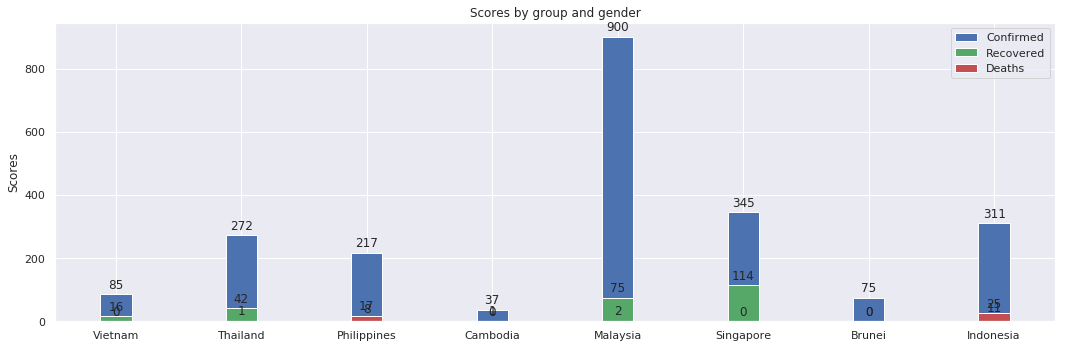

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
rects1 = ax.bar(x, Confirmed, color = 'b', width = 0.25,label='Confirmed')
rects2 = ax.bar(x, Recovered, color = 'g', width = 0.25,label='Recovered')
rects3 = ax.bar(x, Deaths, color = 'r', width = 0.25,label='Deaths')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(country)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

fig,ax=plt.subplots(1,3,figsize=(25,8))
fig.suptitle('Categorical plot',fontsize=15)

country=['Vietnam','Thailand','Philippines','Cambodia','Malaysia','Singapore']
case=['Confirmed','Recovered','Deaths']
colors=['blue','green','black']
j=0
k=0

for i in range(3):
    for name in country:
        ax[i].bar(df.index[df.index.get_loc(name)],df[case[j]].loc[name],color=colors[k])
            
    ax[i].set_xticks(range(len(country)))
    ax[i].set_xticklabels(country,rotation=90,fontsize=15)
    ax[i].set_title('All cases in some Asean countries',fontsize=15)
    ax[i].set_xlabel('Country',fontsize=15)
    ax[i].set_ylabel('Number of cases',fontsize=15)
    ax[i].legend([case[j]],loc='upper left')
    j+=1
    k+=1
    
plt.show()

### New coronavirus Cases per day

In [ ]:
daily=pd.read_excel('../input/daily-case/COVID-19-geographic-disbtribution-worldwide-2020-03-20.xlsx')
daily.head()

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId
0,2020-03-20,20,3,2020,0,0,Afghanistan,AF
1,2020-03-19,19,3,2020,0,0,Afghanistan,AF
2,2020-03-18,18,3,2020,1,0,Afghanistan,AF
3,2020-03-17,17,3,2020,5,0,Afghanistan,AF
4,2020-03-16,16,3,2020,6,0,Afghanistan,AF


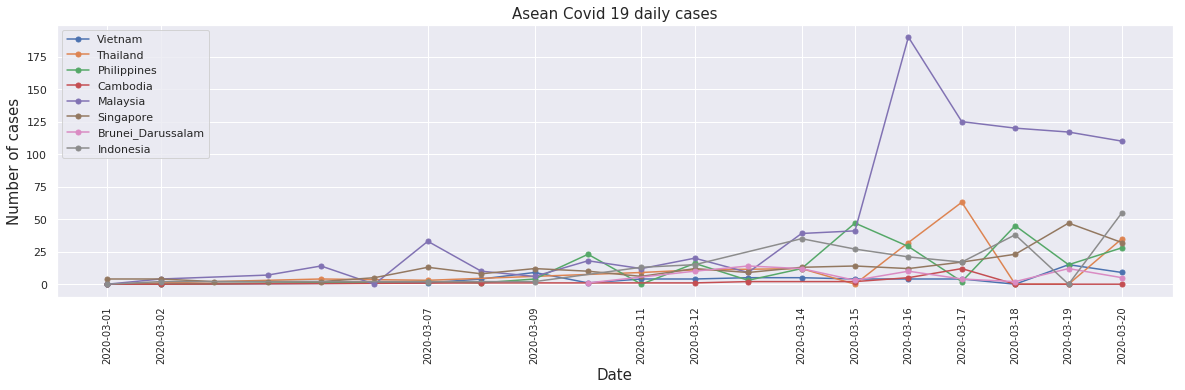

In [ ]:
country=['Vietnam','Thailand','Philippines','Cambodia','Malaysia','Singapore','Brunei_Darussalam','Indonesia']

fig, ax = plt.subplots(figsize=(20,5))
for i in range(len(country)):
    filter_a = daily['Countries and territories'] == country[i]
    filter_b= daily['DateRep'] >= '2020-03-01'
    y=daily['Cases'][filter_a & filter_b]
    x=daily['DateRep'][filter_a & filter_b]
    
    ax.plot(x,y,marker='o',markersize=5,label=country[i])

#convert to datetime
x2=pd.to_datetime(x,infer_datetime_format=True)
x3=pd.Series(x2)
x4=x3.dt.date

ax.set_xlabel('Date',fontsize=15)
ax.set_ylabel('Number of cases',fontsize=15)
ax.set_title('Asean Covid 19 daily cases',fontsize=15)
ax.set_xticks(x4)
ax.set_xticklabels(x4,fontsize=10,rotation=90)
ax.legend()


#fig.tight_layout()

plt.show()

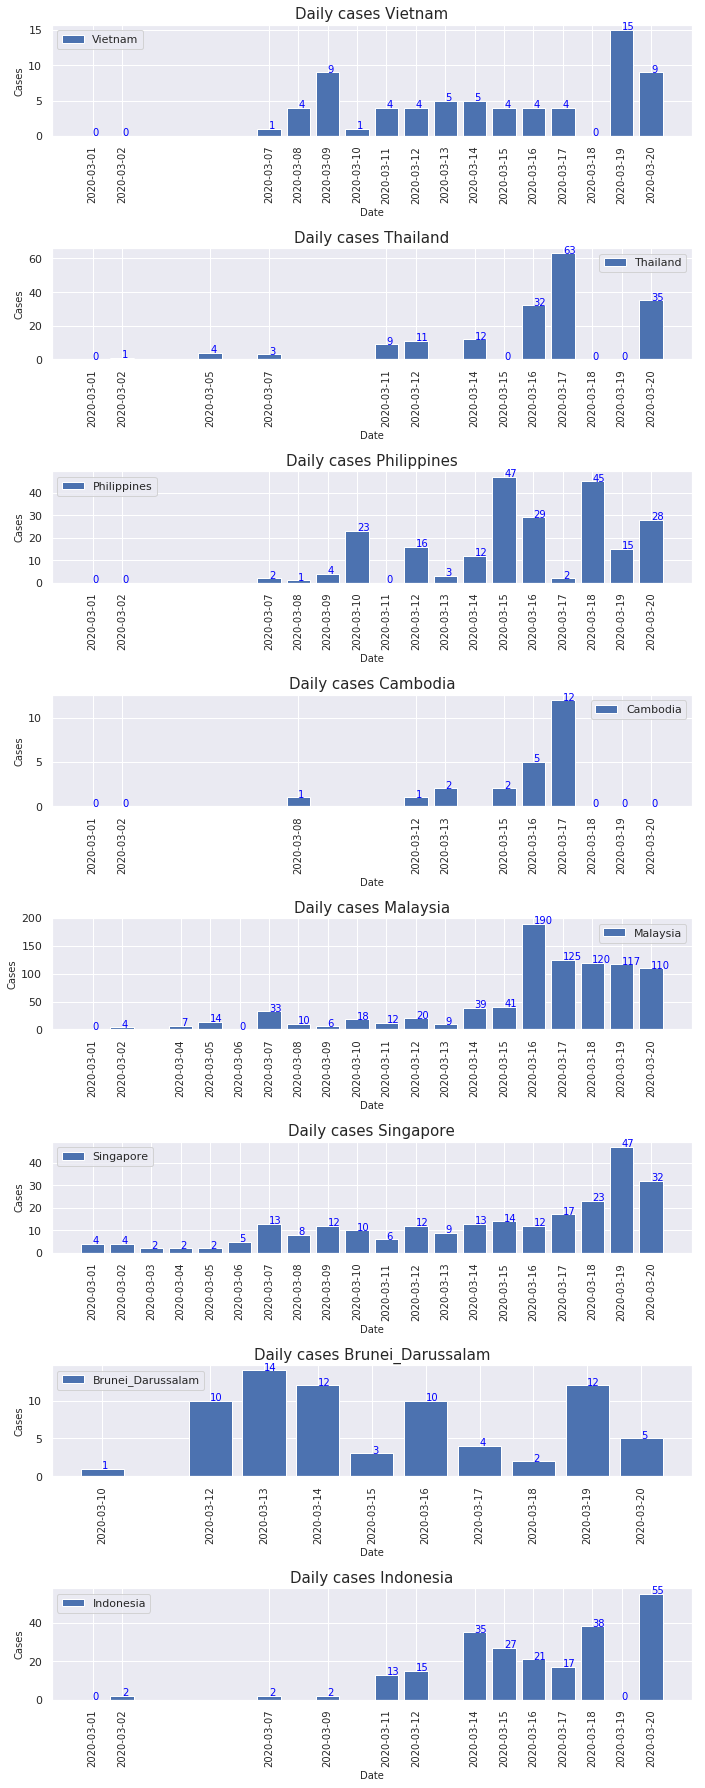

In [ ]:
country=['Vietnam','Thailand','Philippines','Cambodia','Malaysia','Singapore','Brunei_Darussalam','Indonesia']

fig, ax = plt.subplots(len(country),1,figsize=(10,25))

        
for i in range(len(country)):
    filter_a = daily['Countries and territories'] == country[i]
    filter_b= daily['DateRep'] >= '2020-03-01'
    y=daily['Cases'][filter_a & filter_b]
    x=daily['DateRep'][filter_a & filter_b]
    
    rects1=ax[i].bar(x,y,label=country[i])

    #convert to datetime
    x2=pd.to_datetime(x,infer_datetime_format=True)
    x3=pd.Series(x2)
    x4=x3.dt.date

    ax[i].set_xlabel('Date',fontsize=10)
    ax[i].set_ylabel('Cases',fontsize=10)
    ax[i].set_title('Daily cases ' + country[i],fontsize=15)
    ax[i].set_xticks(x4)
    ax[i].set_xticklabels(x4,fontsize=10,rotation=90)
    ax[i].legend()
    #autolabel(rects1)
    for a,b in zip(x,y):
        ax[i].text(a, b, str(b), color='blue',fontsize=10)

fig.tight_layout()

plt.show()

In [ ]:
newdaily = daily.groupby('DateRep',as_index=False)[['DateRep','Cases','Deaths']].sum()
newdaily


,DateRep,Cases,Deaths
0,2019-12-31,27,0
1,2020-01-01,0,0
2,2020-01-02,0,0
3,2020-01-03,17,0
4,2020-01-04,0,0
...,...,...,...
76,2020-03-16,16051,746
77,2020-03-17,12745,596
78,2020-03-18,14750,770
79,2020-03-19,18345,970


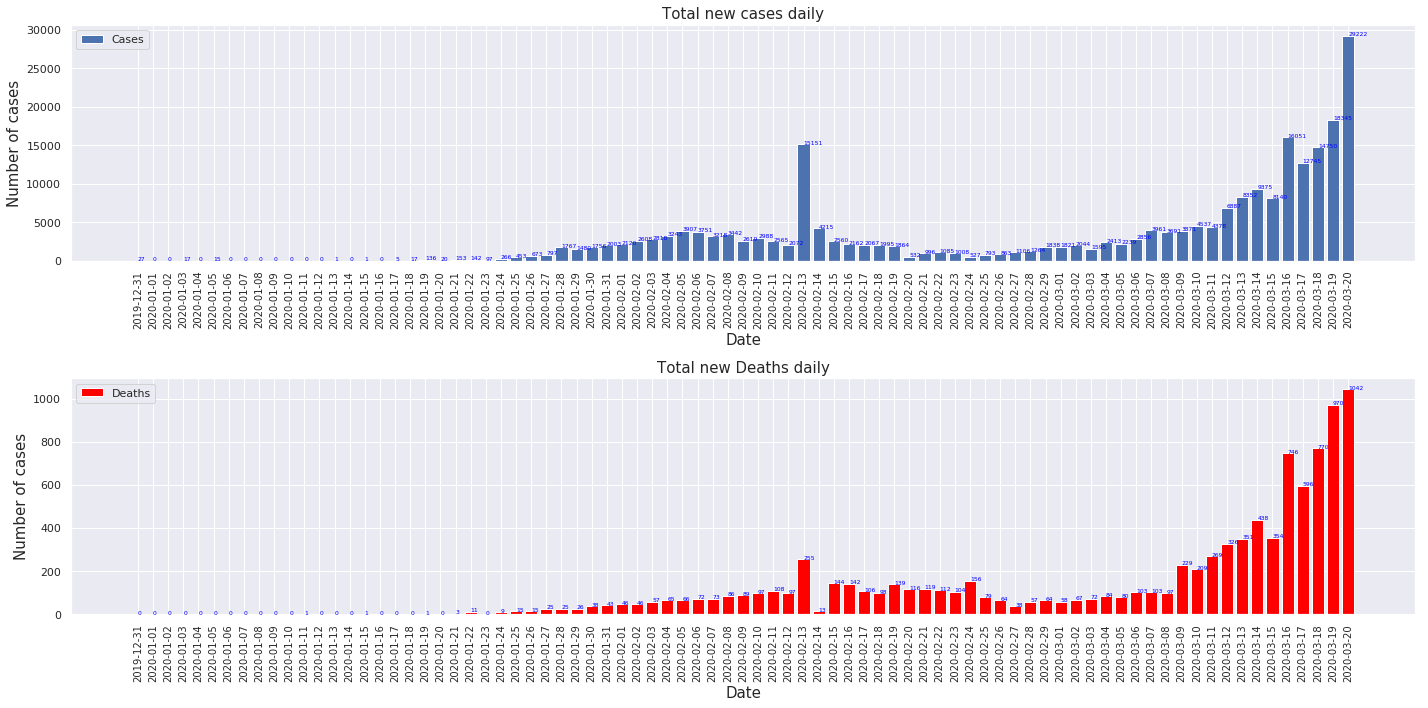

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(20,10))
rects0=ax[0].bar(newdaily['DateRep'],newdaily['Cases'],label='Cases')
rects1=ax[1].bar(newdaily['DateRep'],newdaily['Deaths'],label = 'Deaths',color='red')
       
x2=pd.to_datetime(newdaily['DateRep'],infer_datetime_format=True)
x3=pd.Series(x2)
x4=x3.dt.date

ax[0].set_xlabel('Date',fontsize=15)
ax[0].set_ylabel('Number of cases',fontsize=15)
ax[0].set_title('Total new cases daily',fontsize=15)
ax[0].set_xticks(x4)
ax[0].set_xticklabels(x4,fontsize=10,rotation=90)
ax[0].legend()

ax[1].set_xlabel('Date',fontsize=15)
ax[1].set_ylabel('Number of cases',fontsize=15)
ax[1].set_title('Total new Deaths daily',fontsize=15)
ax[1].set_xticks(x4)
ax[1].set_xticklabels(x4,fontsize=10,rotation=90)
ax[1].legend()

#a=np.ones((1,range(len(x4))))
#X: toa do x; y: toa do y
#x=np.array(range(81))
#x=x.tolist()
#print('x',x)
#y=np.ones((1,81))
#y=y[0].tolist()
#print('y',x)

#Name:
x=newdaily['DateRep']
y=newdaily['Cases']
for a,b in zip(x,y):
    ax[0].text(a, b, str(b), color='blue',fontsize=7)
    
y=newdaily['Deaths']
for a,b in zip(x,y):
    ax[1].text(a, b, str(b), color='blue',fontsize=7)


    
fig.tight_layout()

plt.show()

#X: toa do x; y: toa do y
x=np.array(range(10))
x=x.tolist()
print('x',x)
y=np.ones((1,10))
y=y[0].tolist()
print('y',y)
plt.bar(x, y)

for index, value in enumerate(y):
    print(index,value)
    plt.text(index, value, str(value))